In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv('IOT-temp.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [38]:
df.drop(["room_id/id"], axis = 1, inplace = True) 
df.head()

,id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,08-12-2018 09:29,31,In


In [39]:
df['noted_date'] = pd.to_datetime(df['noted_date'])
df_new = df.set_index('noted_date')
df_new.head()

,id,temp,out/in
noted_date,,,
2018-08-12 09:30:00,__export__.temp_log_196134_bd201015,29,In
2018-08-12 09:30:00,__export__.temp_log_196131_7bca51bc,29,In
2018-08-12 09:29:00,__export__.temp_log_196127_522915e3,41,Out
2018-08-12 09:29:00,__export__.temp_log_196128_be0919cf,41,Out
2018-08-12 09:29:00,__export__.temp_log_196126_d30b72fb,31,In


In [40]:
df_new1 = df_new.groupby(df_new.index).mean()

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_new1 = sc.fit_transform(df_new1)

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_new1, model='additive', period=24)

In [46]:
from statsmodels.tsa.arima.model import ARIMA
mod=ARIMA(df_new1,order=(1,1,3))
model=mod.fit()

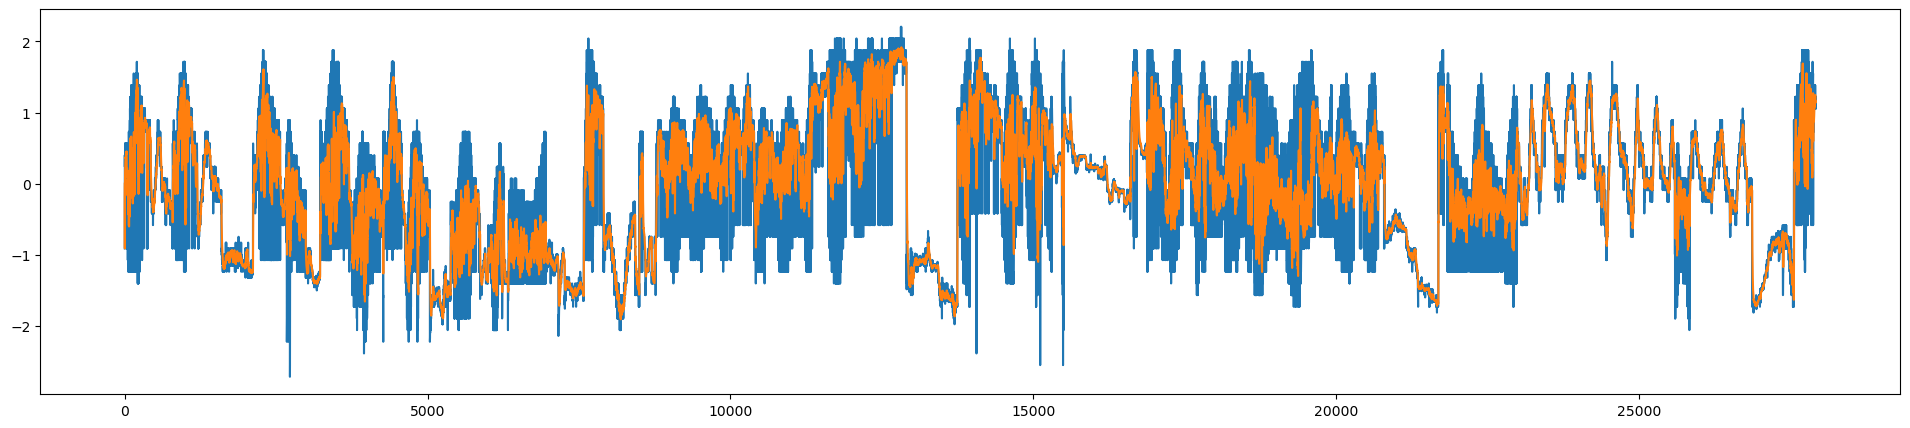

In [47]:
plt.figure(figsize=(24,5))
plt.plot(df_new1)
plt.plot(model.predict())
plt.show()